<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data-Prep" data-toc-modified-id="Data-Prep-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data Prep</a></span><ul class="toc-item"><li><span><a href="#Drop-any-columns-that-are-not-required" data-toc-modified-id="Drop-any-columns-that-are-not-required-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Drop any columns that are not required</a></span></li><li><span><a href="#Drop-any-rows-which-are-not-market-value-or-vat-inclusive" data-toc-modified-id="Drop-any-rows-which-are-not-market-value-or-vat-inclusive-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Drop any rows which are not market value or vat inclusive</a></span></li><li><span><a href="#Simplfy-the-description-of-property-column-(New/Second-hand)" data-toc-modified-id="Simplfy-the-description-of-property-column-(New/Second-hand)-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Simplfy the description of property column (New/Second-hand)</a></span></li><li><span><a href="#Organise-the-counties-into-regions" data-toc-modified-id="Organise-the-counties-into-regions-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Organise the counties into regions</a></span></li><li><span><a href="#Convert-the-price-column-to-numerical" data-toc-modified-id="Convert-the-price-column-to-numerical-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Convert the price column to numerical</a></span></li><li><span><a href="#Final-Dataset" data-toc-modified-id="Final-Dataset-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Final Dataset</a></span></li><li><span><a href="#2018-dataset" data-toc-modified-id="2018-dataset-1.7"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>2018 dataset</a></span></li></ul></li><li><span><a href="#Descriptive-Statistics-Graphs" data-toc-modified-id="Descriptive-Statistics-Graphs-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Descriptive Statistics Graphs</a></span><ul class="toc-item"><li><span><a href="#Box-Plot" data-toc-modified-id="Box-Plot-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Box Plot</a></span></li><li><span><a href="#Mean" data-toc-modified-id="Mean-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Mean</a></span><ul class="toc-item"><li><span><a href="#Year-on-year-percentage-change" data-toc-modified-id="Year-on-year-percentage-change-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Year-on-year percentage change</a></span></li></ul></li><li><span><a href="#Average-house-prices-vs-transactions" data-toc-modified-id="Average-house-prices-vs-transactions-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Average house prices vs transactions</a></span></li><li><span><a href="#Histograms" data-toc-modified-id="Histograms-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Histograms</a></span><ul class="toc-item"><li><span><a href="#Std-and-var" data-toc-modified-id="Std-and-var-2.4.1"><span class="toc-item-num">2.4.1&nbsp;&nbsp;</span>Std and var</a></span></li></ul></li></ul></li></ul></div>

In [1]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
plt.rcParams['text.color'] = 'k'
plt.rcParams['axes.labelcolor'] = 'k'
plt.rcParams['axes.titlesize'] = 25
plt.rcParams['axes.titleweight'] = 'bold'
plt.rcParams['axes.labelsize'] = 22
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['axes.grid'] = True
plt.rcParams['lines.markersize'] = 15
plt.rcParams['lines.markeredgewidth'] = 1
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['legend.fontsize'] = 15

# Data Prep

Load data

In [3]:
data = pd.read_csv("PPR-ALL.csv", encoding= 'unicode_escape')

Original features

In [4]:
data.columns

Index(['Date of Sale (dd/mm/yyyy)', 'Address', 'Postal Code', 'County',
       'Price ()', 'Not Full Market Price', 'VAT Exclusive',
       'Description of Property', 'Property Size Description'],
      dtype='object')

## Drop any columns that are not required

In [5]:
df = data[['Date of Sale (dd/mm/yyyy)','County','Price ()','Not Full Market Price', 'VAT Exclusive','Description of Property']]
df

,Date of Sale (dd/mm/yyyy),County,Price (),Not Full Market Price,VAT Exclusive,Description of Property
0,01/01/2010,Dublin,"343,000.00",No,No,Second-Hand Dwelling house /Apartment
1,03/01/2010,Laois,"185,000.00",No,Yes,New Dwelling house /Apartment
2,04/01/2010,Dublin,"438,500.00",No,No,Second-Hand Dwelling house /Apartment
3,04/01/2010,Meath,"400,000.00",No,No,Second-Hand Dwelling house /Apartment
4,04/01/2010,Kilkenny,"160,000.00",No,No,Second-Hand Dwelling house /Apartment
...,...,...,...,...,...,...
496986,01/10/2021,Sligo,"300,000.00",No,No,Second-Hand Dwelling house /Apartment
496987,01/10/2021,Kildare,"415,000.00",No,No,Second-Hand Dwelling house /Apartment
496988,01/10/2021,Mayo,"165,000.00",No,No,Second-Hand Dwelling house /Apartment
496989,01/10/2021,Wicklow,"422,000.00",No,No,Second-Hand Dwelling house /Apartment


## Drop any rows which are not market value or vat inclusive

In [6]:
df.groupby('Not Full Market Price').count()['Description of Property']

Not Full Market Price
No     472774
Yes     24217
Name: Description of Property, dtype: int64

In [7]:
df.groupby('VAT Exclusive').count()['Description of Property']

VAT Exclusive
No     417828
Yes     79163
Name: Description of Property, dtype: int64

In [8]:
df = df.rename(columns={'Date of Sale (dd/mm/yyyy)': 'Year','Price ()': 'Price'})
df['Year'] = df['Year'].str[6:]
df['Price'] = df['Price'].str[1:] 
df = df[df['Not Full Market Price'] != 'Yes']
df = df[df['VAT Exclusive'] != 'Yes']

In [9]:
df.head()

,Year,County,Price,Not Full Market Price,VAT Exclusive,Description of Property
0,2010,Dublin,"343,000.00",No,No,Second-Hand Dwelling house /Apartment
2,2010,Dublin,"438,500.00",No,No,Second-Hand Dwelling house /Apartment
3,2010,Meath,"400,000.00",No,No,Second-Hand Dwelling house /Apartment
4,2010,Kilkenny,"160,000.00",No,No,Second-Hand Dwelling house /Apartment
5,2010,Dublin,"425,000.00",No,No,Second-Hand Dwelling house /Apartment


## Simplfy the description of property column (New/Second-hand)

In [10]:
df['Description of Property'].unique()

array(['Second-Hand Dwelling house /Apartment',
       'New Dwelling house /Apartment', 'Teach/Árasán Cónaithe Atháimhe'],
      dtype=object)

In [11]:
df['Description of Property'] = df['Description of Property'].replace('Second-Hand Dwelling house /Apartment', 'Second-Hand')
df['Description of Property'] = df['Description of Property'].replace('New Dwelling house /Apartment', 'New')

In [12]:
build_types = ['New','Second-Hand']
df = df[df['Description of Property'].isin(build_types)]

In [13]:
df['Description of Property'].unique()

array(['Second-Hand', 'New'], dtype=object)

In [14]:
df = df[['Year','County','Price','Description of Property']]

## Organise the counties into regions

In [15]:
df['County'].unique()

array(['Dublin', 'Meath', 'Kilkenny', 'Limerick', 'Carlow', 'Cork',
       'Clare', 'Sligo', 'Tipperary', 'Wicklow', 'Mayo', 'Longford',
       'Galway', 'Kildare', 'Waterford', 'Laois', 'Louth', 'Kerry',
       'Donegal', 'Wexford', 'Offaly', 'Westmeath', 'Roscommon',
       'Monaghan', 'Cavan', 'Leitrim'], dtype=object)

In [16]:
leinster = ['Meath','Kilkenny','Carlow','Wicklow','Longford','Kildare','Laois','Louth','Wexford','Offaly', 'Westmeath']
munster = ['Limerick','Cork','Clare','Tipperary','Kerry','Waterford']
connaught_ulster = ['Sligo','Mayo','Galway','Donegal','Roscommon','Monaghan', 'Cavan', 'Leitrim']

In [17]:
df['Region'] = 'N/A'
df.loc[df['County'] == 'Dublin', 'Region'] = 'Dublin'
df.loc[df['County'].isin(leinster), 'Region'] = 'Leinster'
df.loc[df['County'].isin(munster), 'Region'] = 'Munster'
df.loc[df['County'].isin(connaught_ulster), 'Region'] = 'Connaught_Ulster'

In [18]:
df[df['Region']=="N/A"]

,Year,County,Price,Description of Property,Region


In [19]:
df = df[['Year','Region','Price','Description of Property']]
df = df.sort_values('Region')
df = df.reset_index(drop=True)
df.head()

,Year,Region,Price,Description of Property
0,2019,Connaught_Ulster,"72,000.00",Second-Hand
1,2019,Connaught_Ulster,"155,000.00",Second-Hand
2,2016,Connaught_Ulster,"109,000.00",Second-Hand
3,2014,Connaught_Ulster,"30,000.00",Second-Hand
4,2015,Connaught_Ulster,"45,000.00",Second-Hand


## Convert the price column to numerical

In [20]:
df['Price'] = df['Price'].str.replace(',','')
df['Price'] = df['Price'].astype(float)

In [21]:
df['Price'].min()

5030.53

In [22]:
df['Price'].max()

129500000.0

## Final Dataset

In [23]:
df['Year'].min()

'2010'

In [24]:
df['Year'].max()

'2021'

In [25]:
df.head()

,Year,Region,Price,Description of Property
0,2019,Connaught_Ulster,72000.0,Second-Hand
1,2019,Connaught_Ulster,155000.0,Second-Hand
2,2016,Connaught_Ulster,109000.0,Second-Hand
3,2014,Connaught_Ulster,30000.0,Second-Hand
4,2015,Connaught_Ulster,45000.0,Second-Hand


In [26]:
len(df)

397021

## 2018 dataset

In [27]:
df2018 = df[df['Year'] == '2018']
df2018 = df2018.reset_index(drop=True)
df2018

,Year,Region,Price,Description of Property
0,2018,Connaught_Ulster,155000.0,Second-Hand
1,2018,Connaught_Ulster,145000.0,Second-Hand
2,2018,Connaught_Ulster,147000.0,Second-Hand
3,2018,Connaught_Ulster,150000.0,Second-Hand
4,2018,Connaught_Ulster,97500.0,Second-Hand
...,...,...,...,...
43673,2018,Munster,205000.0,Second-Hand
43674,2018,Munster,206500.0,Second-Hand
43675,2018,Munster,165000.0,Second-Hand
43676,2018,Munster,50000.0,Second-Hand


In [28]:
df2018.groupby('Description of Property').mean()

,Price
Description of Property,
New,449726.407783
Second-Hand,281614.568794


In [29]:
df2018.to_excel('ppr2018.xlsx')

# Descriptive Statistics Graphs

In [30]:
df2 = df.copy()
df2['Region'] = 'National'
df3 = df2.append(df)

In [31]:
df3.Region.unique()

array(['National', 'Connaught_Ulster', 'Dublin', 'Leinster', 'Munster'],
      dtype=object)

In [32]:
df.Region.unique()

array(['Connaught_Ulster', 'Dublin', 'Leinster', 'Munster'], dtype=object)

## Box Plot

In [33]:
x1 = df2018.loc[df2018['Region']=='Connaught_Ulster'].Price
x2 = df2018.loc[df2018['Region']=='Munster'].Price
x3 = df2018.loc[df2018['Region']=='Leinster'].Price
x4 = df2018.loc[df2018['Region']=='Dublin'].Price
x5 = df2018.loc[df2018['Region']=='National'].Price

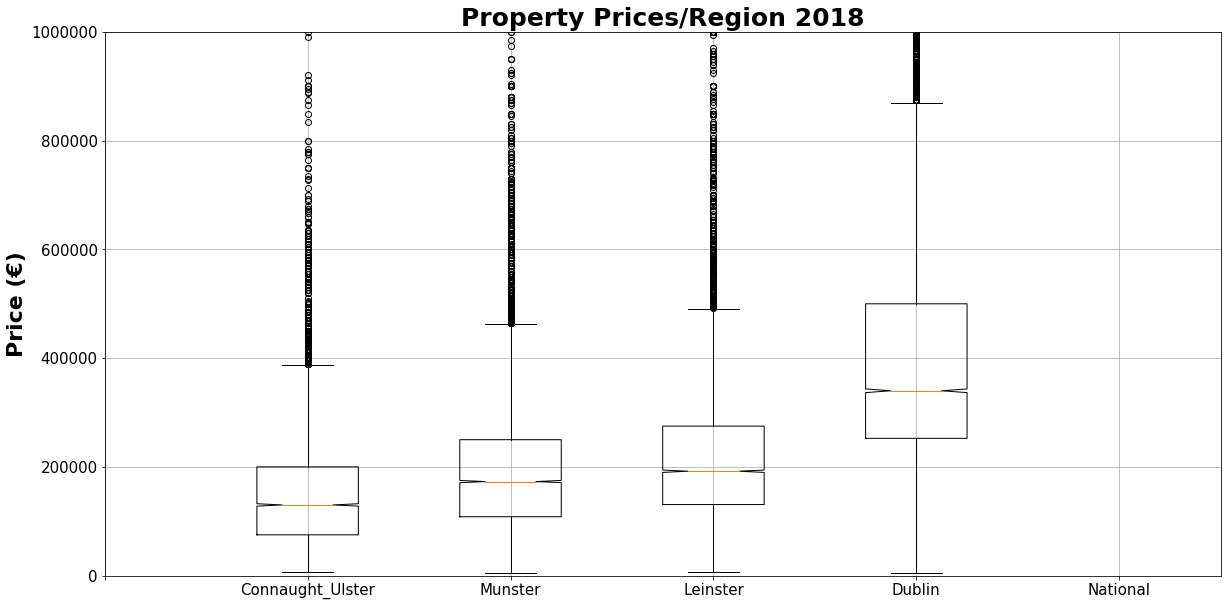

In [34]:
data = [x1,x2,x3,x4,x5]
fig, ax = plt.subplots(figsize=(20,10))
ax.set_title('Property Prices/Region 2018')
plt.ylabel('Price (€)')
ax.boxplot(data, notch=True)
plt.ylim((0,1000000))
plt.xticks([0, 1, 2, 3, 4, 5],['','Connaught_Ulster','Munster','Leinster','Dublin','National'])
plt.rcParams['xtick.labelsize'] = 15
plt.show()

In [35]:
x2.quantile([0.75])

0.75    250000.0
Name: Price, dtype: float64

In [36]:
x4.quantile([0.25])

0.25    252500.0
Name: Price, dtype: float64

## Mean

In [37]:
yearly_mean_df = df3.groupby(['Region', 'Year'])['Price'].mean()
yearly_mean_df

Region            Year
Connaught_Ulster  2010    175278.950213
                  2011    152257.240436
                  2012    127741.571214
                  2013    119838.051796
                  2014    115704.435269
                  2015    126878.153087
                  2016    131416.536743
                  2017    152434.236122
                  2018    161379.457212
                  2019    167499.463655
                  2020    167149.539306
                  2021    181647.114321
Dublin            2010    353024.979849
                  2011    326211.412146
                  2012    299127.661907
                  2013    347211.531734
                  2014    376085.547520
                  2015    360635.161456
                  2016    411502.580889
                  2017    443825.537246
                  2018    466443.761556
                  2019    492985.304092
                  2020    490690.626609
                  2021    494362.746199
Leinster         

In [38]:
national_yearly_mean_df = df.groupby(['Year'])['Price'].mean()

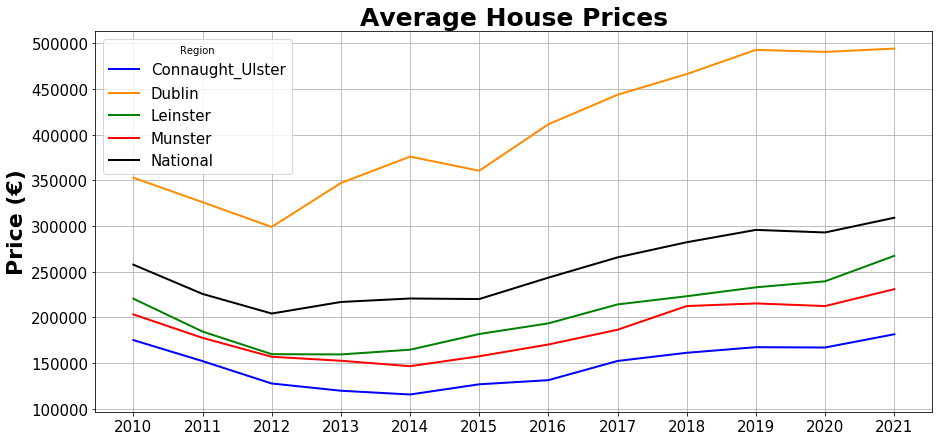

In [39]:
fig, ax = plt.subplots(figsize=(15,7))
yearly_mean_df.unstack().transpose().plot(ax=ax,color=['blue', 'darkorange', 'green', 'red','black'])
ax.set_xticks(range(0,12))
ax.set_xticklabels(sorted(df.Year.unique()),minor=False)
ax.tick_params(axis='x')
ax.set_title('Average House Prices')
plt.xlabel('')
plt.ylabel('Price (€)')
plt.show()

### Year-on-year percentage change

In [40]:
yearly_mean_df.unstack().transpose()

Region,Connaught_Ulster,Dublin,Leinster,Munster,National
Year,,,,,
2010,175278.950213,353024.979849,220595.981678,203405.148603,257820.723831
2011,152257.240436,326211.412146,184604.680048,177681.988618,225802.750362
2012,127741.571214,299127.661907,159857.710573,157013.080213,204327.657539
2013,119838.051796,347211.531734,159577.004077,152650.032153,216987.707626
2014,115704.435269,376085.547520,164731.910202,146706.658127,220797.454951
2015,126878.153087,360635.161456,181924.737206,157566.537590,220181.221412
2016,131416.536743,411502.580889,193581.937129,170434.178742,243630.180499
2017,152434.236122,443825.537246,214324.194138,186599.433700,265838.506329
2018,161379.457212,466443.761556,223271.547706,212537.764194,282395.893564


In [41]:
yearly_mean_df.unstack().transpose().pct_change()

Region,Connaught_Ulster,Dublin,Leinster,Munster,National
Year,,,,,
2010,NaN,NaN,NaN,NaN,NaN
2011,-0.131343,-0.075954,-0.163155,-0.126463,-0.124187
2012,-0.161015,-0.083025,-0.134054,-0.116325,-0.095106
2013,-0.061871,0.160747,-0.001756,-0.027788,0.061960
2014,-0.034493,0.083160,0.032304,-0.038935,0.017557
2015,0.096571,-0.041082,0.104369,0.074024,-0.002791
2016,0.035770,0.141050,0.064077,0.081665,0.106498
2017,0.159932,0.078549,0.107150,0.094847,0.091156
2018,0.058682,0.050962,0.041747,0.139005,0.062284


In [42]:
pct_change_df = yearly_mean_df.unstack().transpose().pct_change()
pct_change_df.mean()

Region
Connaught_Ulster    0.007709
Dublin              0.034012
Leinster            0.021727
Munster             0.015193
National            0.019143
dtype: float64

## Average house prices vs transactions

In [43]:
df.groupby('Year').Price.mean()

Year
2010    257820.723831
2011    225802.750362
2012    204327.657539
2013    216987.707626
2014    220797.454951
2015    220181.221412
2016    243630.180499
2017    265838.506329
2018    282395.893564
2019    295882.377135
2020    293093.073497
2021    309175.269176
Name: Price, dtype: float64

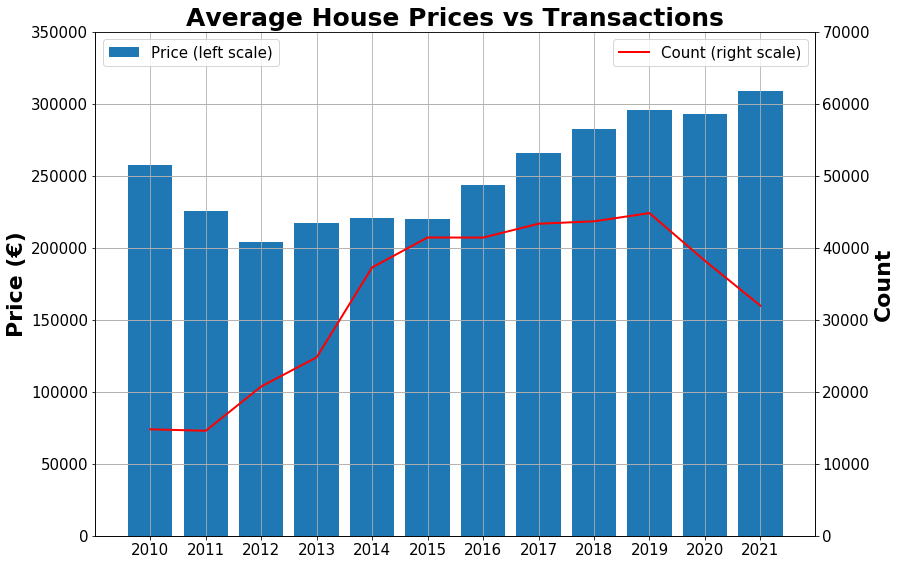

In [44]:
fig = plt.figure(figsize=(10,7))
ax = fig.add_axes([0,0,1,1])
years = sorted(df3.Year.unique())
ax.bar(years,df.groupby('Year').Price.mean())
ax.set_ylim((0, 350000))
ax.set_yticks(np.arange(0,400000,50000))
ax.legend(['Price (left scale)'],loc=2)
plt.ylabel('Price (€)')
ax2 = ax.twinx()
ax2.set_ylim((0, 70000))
ax2.set_yticks(np.arange(0, 80000,10000))
ax2.plot(years,df.groupby('Year').Price.count(),color='red')
plt.title('Average House Prices vs Transactions')
ax2.legend(['Count (right scale)'],loc=0)
plt.ylabel('Count')
plt.show()

In [45]:
df.groupby('Year').Price.mean().pct_change().mean()

0.019142946311638032

In [46]:
df.groupby('Year').Price.count().pct_change().mean()

0.08977440584594165

## Histograms

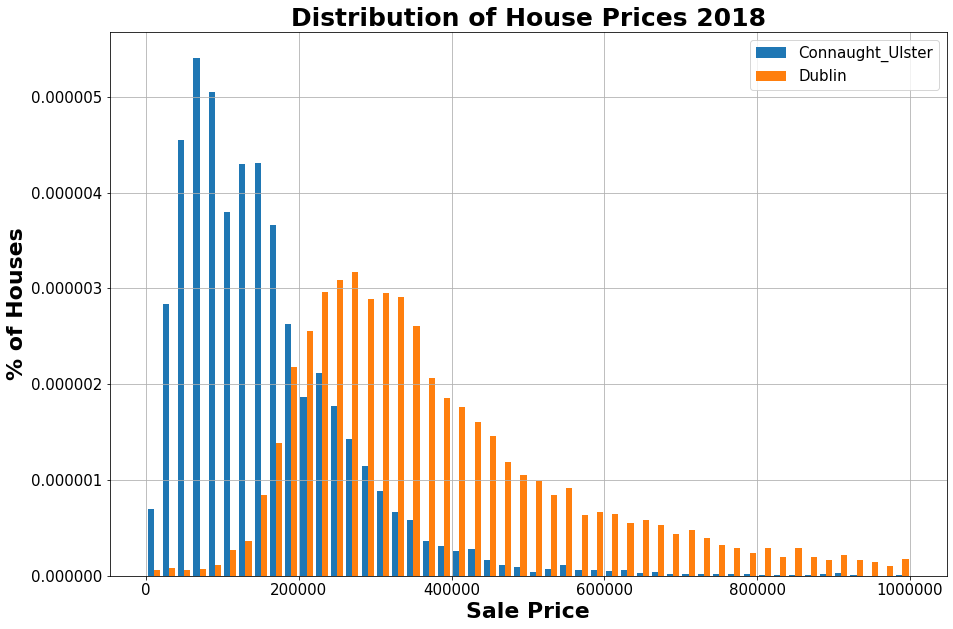

In [47]:
x1 = df2018.loc[df2018['Region']=='Connaught_Ulster'].Price
##x2 = df2020.loc[df2020['Region']=='Munster'].Price
##x3 = df2020.loc[df2020['Region']=='Leinster'].Price
x4 = df2018.loc[df2018['Region']=='Dublin'].Price
labels=['Connaught_Ulster','Dublin']
plt.figure(figsize=(15,10))
plt.hist([x1,x4], range=[0, 1000000], bins = 50, density=True)
plt.title('Distribution of House Prices 2018')
plt.xlabel('Sale Price')
plt.ylabel('% of Houses')
plt.legend(labels)
##plt.xlim([0, 1000000])
plt.show()

In [48]:
x1.mean()

161379.45721242865

In [49]:
x4.mean()

466443.7615560803

### Std and var

In [50]:
x1.var()

171187511713.76685

In [51]:
x4.var()

961702184677.7324

In [52]:
x1.var() > x4.var()

False

In [53]:
x1.std()

413748.12593384256

In [54]:
x4.std()

980664.1548857245